# Project Objectives:

* **Sleep Quality Analysis :** Monitor and analyze a user’s sleep data over time to provide insights on sleep quality and possible improvements.

* **Dream Pattern Detection :** Use NLP on dream journal entries to detect common themes and emotions, helping users understand how their subconscious mind reflects their emotional state.

* **Lifestyle Impact Analysis :** Correlate lifestyle factors (like caffeine intake, exercise, stress level) with sleep quality.

* **Personalized Recommendations:** Based on analyzed data, the assistant will provide personalized recommendations to improve sleep quality and manage recurring emotions in dreams.

In [41]:
import pandas as pd
import numpy as np
import re
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

os.chdir("C:\\Users\\kkeshav\\Downloads")

In [3]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kkeshav\AppData\Roaming\nltk_data...


In [5]:
sleep_df = pd.read_csv('wellbeing_and_lifestyle.csv')
dreams_df = pd.read_csv('dreams.csv')
wellbeing_df = pd.read_csv('Sleep_health_and_lifestyle.csv')

In [6]:
sleep_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [7]:
sleep_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [8]:
dreams_df.head()

,Unnamed: 0,dreams_text
0,0,001 Nightmare in Cambodia. In the dream we are...
1,1,"002 The enemy is above, in the sky. We are not..."
2,2,003 We are on a firebase. It is night time. In...
3,3,004 We are on an LZ; I am. saying good bye to ...
4,4,"005 This time, it is not the popping of the tu..."


In [9]:
sleep_df.fillna(method='ffill', inplace=True)
wellbeing_df.fillna(method='ffill', inplace=True)
dreams_df['dreams_text'] = dreams_df['dreams_text'].fillna('').apply(str.lower)

C:\Users\kkeshav\AppData\Local\Temp\ipykernel_17352\4261632369.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sleep_df.fillna(method='ffill', inplace=True)
C:\Users\kkeshav\AppData\Local\Temp\ipykernel_17352\4261632369.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  wellbeing_df.fillna(method='ffill', inplace=True)


In [10]:
dreams_df.dropna(subset=['dreams_text'], inplace=True)

In [11]:
# Exploratory Data Analysis (EDA)
print("Sleep Health Dataset Overview:")
print(sleep_df.info())
print(sleep_df.describe())

Sleep Health Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int6

In [12]:
print("Wellbeing Dataset Overview:")
print(wellbeing_df.info())
print(wellbeing_df.describe())


Wellbeing Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           371 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.

In [13]:
print("Dreams Dataset Overview:")
print(dreams_df.info())


Dreams Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30799 entries, 0 to 30798
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   30799 non-null  int64 
 1   dreams_text  30799 non-null  object
dtypes: int64(1), object(1)
memory usage: 481.4+ KB
None


In [14]:
sleep_df['FRUITS_VEGGIES'] = pd.to_numeric(sleep_df['FRUITS_VEGGIES'], errors='coerce')
sleep_df['DAILY_STRESS'] = pd.to_numeric(sleep_df['DAILY_STRESS'], errors='coerce')
sleep_df['ACHIEVEMENT'] = pd.to_numeric(sleep_df['ACHIEVEMENT'], errors='coerce')
sleep_df['DAILY_STEPS'] = pd.to_numeric(sleep_df['DAILY_STEPS'], errors='coerce')
sleep_df['WORK_LIFE_BALANCE_SCORE'] = pd.to_numeric(sleep_df['WORK_LIFE_BALANCE_SCORE'], errors='coerce')

In [15]:
# Feature Engineering
# Create 'Wellbeing Score' and 'Sleep Quality Score' based on specific columns
sleep_df['Wellbeing_Score'] = (
    sleep_df['FRUITS_VEGGIES'] * 0.1 + 
    sleep_df['DAILY_STRESS'] * -0.2 + 
    sleep_df['ACHIEVEMENT'] * 0.3 + 
    sleep_df['DAILY_STEPS'] * 0.2 + 
    sleep_df['WORK_LIFE_BALANCE_SCORE'] * 0.3
)

wellbeing_df['Sleep_Quality_Score'] = (
    wellbeing_df['Sleep Duration'] * 0.5 +
    wellbeing_df['Quality of Sleep'] * 0.5
)

In [16]:
# Sentiment Analysis on Dreams Data
dreams_df['dream_sentiment'] = dreams_df['dreams_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [18]:
sleep_df.columns = sleep_df.columns.str.lower()
wellbeing_df.columns = wellbeing_df.columns.str.lower()
wellbeing_df['age'] = wellbeing_df['age'].astype(str)

In [19]:
# Step 1: Map age ranges in sleep_df to representative ages
age_mapping = {
    'Less than 20': '19',  # or any representative value
    '21 to 35': '28',      # or the midpoint
    '36 to 50': '43',      # or the midpoint
    '51 or more': '55'     # or any representative value
}

sleep_df['age'] = sleep_df['age'].map(age_mapping)

# Step 2: Strip whitespace from gender columns
sleep_df['gender'] = sleep_df['gender'].str.strip()
wellbeing_df['gender'] = wellbeing_df['gender'].str.strip()


In [20]:
# Merge Datasets based on 'Age' and 'Gender' as common features
merged_df = pd.merge(sleep_df, wellbeing_df, on=['age', 'gender'], how='left')
merged_df = pd.merge(merged_df, dreams_df, left_index=True, right_index=True, how='left')

In [21]:
dreams_df.head()

,Unnamed: 0,dreams_text,dream_sentiment
0,0,001 nightmare in cambodia. in the dream we are...,0.4033
1,1,"002 the enemy is above, in the sky. we are not...",-0.9837
2,2,003 we are on a firebase. it is night time. in...,-0.9741
3,3,004 we are on an lz; i am. saying good bye to ...,-0.9755
4,4,"005 this time, it is not the popping of the tu...",0.2238


In [22]:
merged_df.columns

Index(['timestamp', 'fruits_veggies', 'daily_stress', 'places_visited',
       'core_circle', 'supporting_others', 'social_network', 'achievement',
       'donation', 'bmi_range', 'todo_completed', 'flow', 'daily_steps',
       'live_vision', 'sleep_hours', 'lost_vacation', 'daily_shouting',
       'sufficient_income', 'personal_awards', 'time_for_passion',
       'weekly_meditation', 'age', 'gender', 'work_life_balance_score',
       'wellbeing_score', 'person id', 'occupation', 'sleep duration',
       'quality of sleep', 'physical activity level', 'stress level',
       'bmi category', 'blood pressure', 'heart rate', 'daily steps',
       'sleep disorder', 'sleep_quality_score', 'Unnamed: 0', 'dreams_text',
       'dream_sentiment'],
      dtype='object')

In [27]:
merged_df = merged_df.dropna(subset=['dream_sentiment'])
merged_df = merged_df.dropna(subset=['stress level'])
merged_df = merged_df.dropna(subset=['sleep disorder'])

In [28]:
# Select relevant columns for modeling
features = merged_df[['sleep_quality_score', 'wellbeing_score', 'stress level', 'dream_sentiment']]
target = merged_df['sleep disorder']  # Assuming 'Sleep Disorder' is the column to predict

In [29]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Prediction and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Model Accuracy: 0.8951873692219897

Classification Report:
               precision    recall  f1-score   support

    Insomnia       0.92      0.95      0.94      4314
 Sleep Apnea       0.74      0.63      0.68       943

    accuracy                           0.90      5257
   macro avg       0.83      0.79      0.81      5257
weighted avg       0.89      0.90      0.89      5257



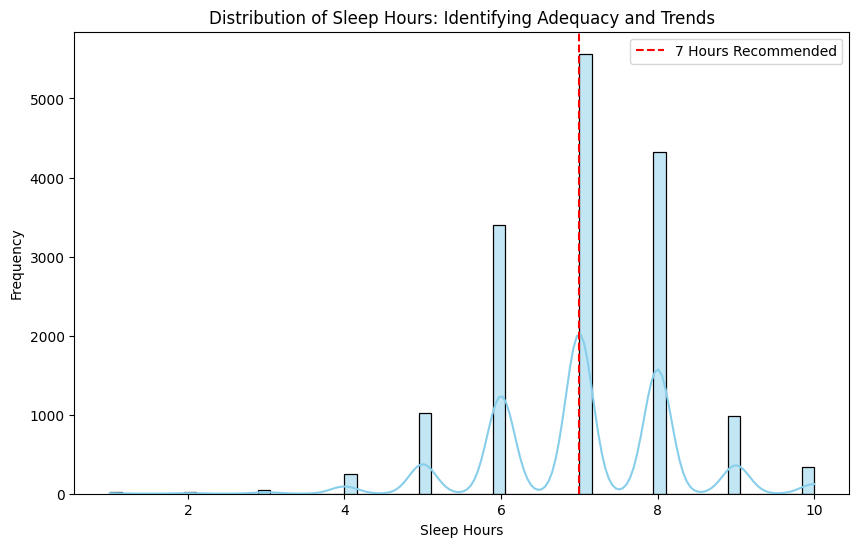

In [33]:
# Distribution of Sleep Hours with Detailed Analysis
plt.figure(figsize=(10, 6))
sns.histplot(sleep_df['sleep_hours'], kde=True, color='skyblue')
plt.title("Distribution of Sleep Hours: Identifying Adequacy and Trends")
plt.xlabel("Sleep Hours")
plt.ylabel("Frequency")
plt.axvline(7, color='red', linestyle='--', label='7 Hours Recommended')
plt.legend()
plt.show()

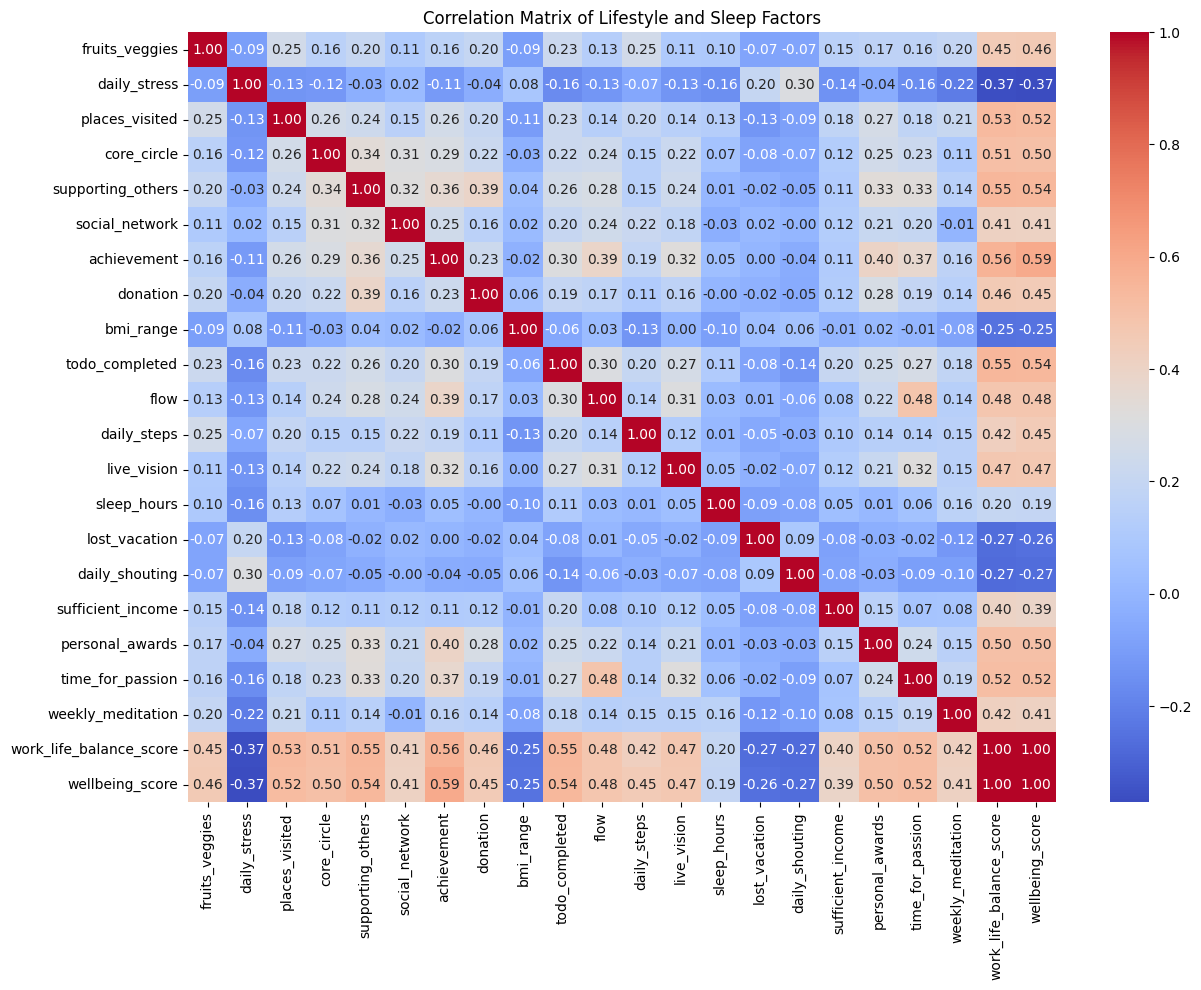

In [37]:
# Select only numeric columns
numeric_df = sleep_df.select_dtypes(include=[np.number])

# Calculate the correlation
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Lifestyle and Sleep Factors")
plt.show()


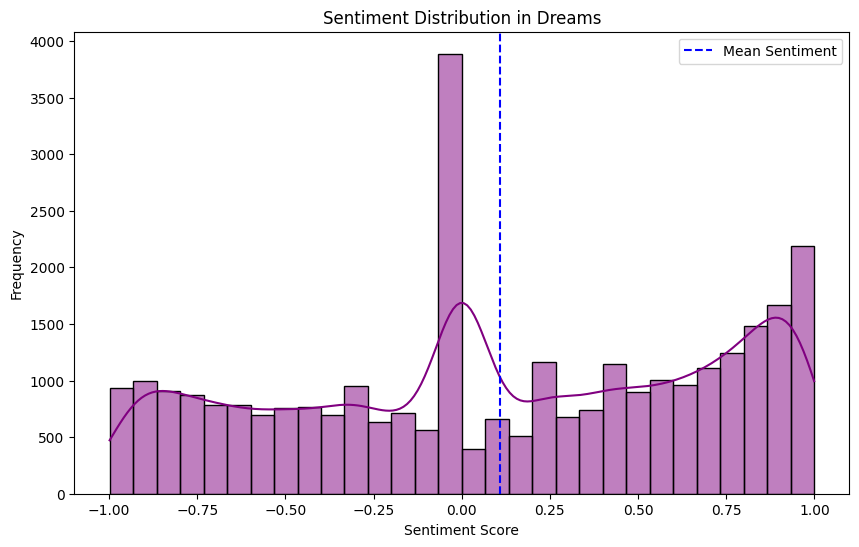

In [39]:
# Sentiment Analysis of Dreams: Distribution and Interpretations
dreams_df['Sentiment'] = dreams_df['dreams_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
plt.figure(figsize=(10, 6))
sns.histplot(dreams_df['Sentiment'], kde=True, color='purple')
plt.title("Sentiment Distribution in Dreams")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.axvline(dreams_df['Sentiment'].mean(), color='blue', linestyle='--', label='Mean Sentiment')
plt.legend()
plt.show()


In [40]:
# Advanced NLP for Dream Theme Analysis: Topic Modeling with LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english')
dream_text_data = vectorizer.fit_transform(dreams_df['dreams_text'])
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(dream_text_data)

# Display the most frequent words per topic
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"\nTop 10 words for Topic #{idx + 1} (Dream Themes):")
    print([words[i] for i in topic.argsort()[-10:]])

# Predictive Modeling for Sleep Quality: Enhancing Analysis
# Creating a binary target for predicting adequate sleep (7+ hours)
X = sleep_df.drop(['sleep_hours'], axis=1)
y = sleep_df['sleep_hours'].apply(lambda x: 1 if x >= 7 else 0)


Top 10 words for Topic #1 (Dream Themes):
['house', 'didn', 'really', 'got', 'remember', 'going', 'just', 'went', 'dream', 'like']

Top 10 words for Topic #2 (Dream Themes):
['big', 'point', 'woman', 'room', 'guy', 'going', 'house', 'car', 'like', 'people']

Top 10 words for Topic #3 (Dream Themes):
['away', 'just', 'don', 'time', 'woke', 'dreams', 'man', 'saw', 'remember', 'dream']


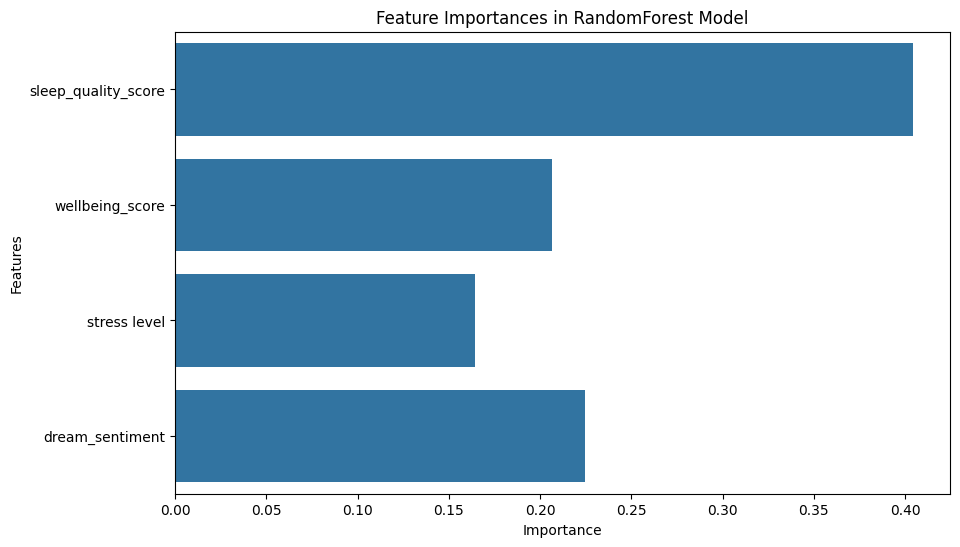

In [31]:
# Visualization
# Plot feature importances
feature_importances = model.feature_importances_
features_list = features.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features_list)
plt.title("Feature Importances in RandomForest Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [46]:
# Function to analyze dreams and provide sentiment score
def analyze_dream(dream_text):
    sentiment = sia.polarity_scores(dream_text)
    sentiment_score = sentiment['compound']
    
    if sentiment_score >= 0.05:
        sentiment_label = 'positive'
    elif sentiment_score <= -0.05:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'
        
    return sentiment_label, sentiment_score

In [47]:
# Function to generate recommendations based on scores
def generate_recommendations(wellbeing_score, sleep_quality_score, dream_sentiment):
    recommendations = []
    
    # Check overall wellbeing and provide general recommendations
    if wellbeing_score < 3:
        recommendations.append("Consider focusing on a balanced diet and increasing physical activity.")
    if sleep_quality_score < 3:
        recommendations.append("Try to improve sleep hygiene, such as limiting screen time before bed.")
    
    # Provide insights based on dream sentiment
    if dream_sentiment == 'negative':
        recommendations.append("You may be experiencing stress or anxiety. Consider mindfulness exercises or talking to a mental health professional.")
    elif dream_sentiment == 'positive':
        recommendations.append("Keep up with positive practices, as it seems to reflect in your dream patterns.")
    
    return recommendations


In [48]:
# Example of using the functions with sample input
sample_dream_text = "I was flying over beautiful mountains and felt very calm."
sentiment_label, sentiment_score = analyze_dream(sample_dream_text)
recommendations = generate_recommendations(
    wellbeing_score=4.2,  # Sample score
    sleep_quality_score=3.5,  # Sample score
    dream_sentiment=sentiment_label
)

print("\nDream Analysis:")
print("Sentiment Label:", sentiment_label)
print("Sentiment Score:", sentiment_score)

print("\nRecommendations:")
for rec in recommendations:
    print("-",rec)


Dream Analysis:
Sentiment Label: positive
Sentiment Score: 0.7574

Recommendations:
- Keep up with positive practices, as it seems to reflect in your dream patterns.
